In [1]:
from Bio import SeqIO

import itertools
import pandas as pd
import sys

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def nmer_extract_from_fa(f_name, mot_idxs, ct_idxs,
                         bad_chars=['A','-'], letter_order=['C','G','T','A']):
    """
    Open a .fasta file, extract a given set of bases as a motif 
    and a given set of bases as counted nts.
    
    Arguments:
    f_name          -- The name of the .fasta file to process
    mot_idxs        -- The 0-indexed indices of the letters that make up a 
                        motif, in order
    ct_idxs         -- The 0-indexed indices of the letters to be counted 
                        (for errors, etc.)
    
    Keywords:
    bad_chars       -- Discard motifs that include these characters
    letter_order    -- The letters we're looking for (in order)
    """
    
    seqs = SeqIO.parse(f_name, 'fasta')
    mot = []
    ct_nts = []
    max_idx = max(max(mot_idxs), max(ct_idxs))
     
    for s in seqs:
        # construct motif for each sequence
        if len(s) > max_idx:
            m = ''.join([s[idx] for idx in mot_idxs])
            
            # if it's acceptable, record the motif and count sites
            if all([c not in m for c in bad_chars]):
                mot.append(m)
                ct_nts.append([s[idx] for idx in ct_idxs])
    
    unique_mots = list(set(mot))
    
    # Get totals for each of the motifs
    mot_cts = [mot.count(m) for m in unique_mots]
    
    # Build df
    df = pd.DataFrame({'motif': unique_mots, 'total': mot_cts})
    for c_idx, i in zip(ct_idxs, range(len(ct_idxs))):
        site_letters = [l[i] for l in ct_nts] # Letters at each site
        for letter in letter_order:
            # Get desired letter count for each motif
            site_mot_ct = [[site_letters[i] for i in range(len(mot)) \
                            if mot[i] == m].count(letter) for m in unique_mots]
            df['%s_%i_counts' % (letter, c_idx)] = site_mot_ct
    
    return df

In [4]:
p = 'D:/Google Drive/To File - Research Docs/Screening/nextgenAnalysis/Data/2016_03_24/AMD/'
f = 'aln_seqs_run89_exp89.fa'

m_idxs = [42, 43, 44, 46, 47, 48]
ct_idxs = [45]

In [6]:
mot_df = nmer_extract_from_fa(p+f, m_idxs, ct_idxs)

In [7]:
mot_df

,motif,total,C_45_counts,G_45_counts,T_45_counts,A_45_counts
0,TCTCCG,27,2,22,0,3
1,GTTCTT,24,0,15,1,8
2,TCTCCC,20,2,17,0,1
3,CCCTTT,20,2,15,1,2
4,CCCGCT,22,1,15,2,3
5,CTTCTT,29,0,25,0,4
6,TTGCTC,27,0,21,2,3
7,CCCTTC,27,4,19,2,2
8,TCTCCT,39,2,32,1,4
9,CCCTTG,31,0,24,2,3


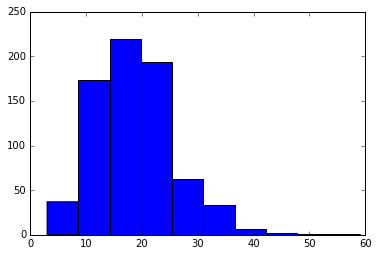

In [84]:
plt.figure()
plt.hist(m_cts.values())
plt.show()